<a href="https://colab.research.google.com/github/AlinaKapshyk/COVID-19_CHALLENGE_30_05_2020/blob/master/COVID_19_CHALLENGE_30_05_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19_CHALLENGE_30_05_2020

Table of contents

    Data Loading
    Exploration of available data
    Visualization of dependencies between variables
    (EU countires and characterizing them parameters)
    Intermediate findings
    Preprocessing
    SVM modeling
    GridSearchCV
    Conclusion

Loading Data

In the below section we will import all the required packages and upload the datasets we plan to work on.

<a href="#https://earthdata.nasa.gov/learn/articles/feature-articles/health-and-air-quality-articles/find-no2-data">NASA.gov_NO2 Data in Giovanni</a>
<a href="#https://www.prb.org/countries-with-the-oldest-populations">NO2_concentrations_over_Europe</a>

<a href="#https://www.iata.org/contentassets/a686ff624550453e8bf0c9b3f7f0ab26/wats-2019-mediakit.pdf">IATA_mediakit_2019</a>

<a href="#http://www.esa.int/ESA_Multimedia/Images/2020/04/NO2_concentrations_over_Europe#.Xqn2IfHbyiU.link">ESA_NO2_concentrations_over_Europe_JAN_20</a> 

<a href="#http://www.esa.int/ESA_Multimedia/Images/2020/04/NO2_concentrations_over_Europe#.Xqn2IfHbyiU.link">ESA_NO2_concentrations_over_Europe_MAY_20</a>  

<a href="#https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide">ECDS_CODIV-19_distribution_worldwide</a> 

<a href="#https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data/resource/260bbbde-2316-40eb-aec3-7cd7bfc2f590">data.europa.eu</a> 

<a href="#https://covid19.who.int/?gclid=CjwKCAjw5cL2BRASEiwAENqAPtp7QNJC_hDNFg6XdeGzDqeILOZ_rNrZSlkYwjIpJIn06o6dZosjHBoCNgYQAvD_BwE">WHO</a> 

<a href="#https://www.prb.org/countries-with-the-oldest-populations">Population_prb.org</a>  

<a href="#https://www.worldometers.info/world-population/europe-population">Woldometrs</a>  

<a href="#https://qap.ecdc.europa.eu/public/extensions/COVID-19/COVID-19.html">European_Center_of_desease_prevention_and_control</a> 

We will use the  data collected and elaborated from 11 resourses mentioned below.
Afterwards we will build a model to analyze which country has tendency to overcome the consequence of CORONA-19
thanks to strict lockdown.
What factors influence the splead of ilness.
What information could be required for future analysis. 

# New Section

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas_profiling
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [0]:
df = pd.read_csv(r'C:\Users\Alina\Desktop\Countires\EUROPE_DATA_csv.csv')

In [0]:
df.head()

country code  NO2_reduction_perc     dateRep  cases  deaths_day  \
0      Germany  DEU                 NaN  29/05/2020    741          39   
1       France  FRA               -54.0  29/05/2020   3325          66   
2  Netherlands  NLD                 NaN  29/05/2020    182          32   
3      Belgium  BEL                 NaN  29/05/2020    257          24   
4      Austria  AUT                 NaN  29/05/2020     28          23   

   ttl_death  ttl_ill_pep  population  yearly_pc_chg  ...  urban_population  \
0       8594       183066    83783942         0.0032  ...          63930305   
1      28714       186835    65273511         0.0022  ...          53217966   
2       5931        46257    17134872         0.0022  ...          15847281   
3       9430        58186    11589623         0.0044  ...          11396775   
4        668        16685     9006398         0.0057  ...           5159360   

   world_population_perc  world_population  global_bank  perc_65_plus  \
0                 0.0107        7794798739           19          21.4   
1                 0.0084        7794798739           22          20.3   
2                 0.0022        7794798739           69          18.9   
3                 0.0015        7794798739           81          18.7   
4                 0.0012        7794798739           97          18.8   

   age_65_74  age_75_84  age_85_and_over  pop_65_plus_mln  ttl_mln  
0         47         39               14            17.78    83.10  
1         54         29               17            13.16    64.83  
2         58         31               12             3.27    17.34  
3         53         32               15             2.15    11.46  
4         50         37               13             1.67     8.88  

[5 rows x 26 columns]

In [0]:
df = pd.read_csv(r'C:\Users\Alina\Desktop\Countires\EUROPE_DATA_csv.csv')
pandas_profiling.ProfileReport(df)

C:\Users\Alina\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 26 columns):
country                  15 non-null object
code                     15 non-null object
NO2_reduction_perc       3 non-null float64
dateRep                  15 non-null object
cases                    15 non-null int64
deaths_day               15 non-null int64
ttl_death                15 non-null int64
ttl_ill_pep              15 non-null int64
population               15 non-null int64
yearly_pc_chg            15 non-null float64
yearly_change            15 non-null int64
migrants                 15 non-null int64
median_age               15 non-null float64
fertility_rate           15 non-null float64
density _p_sqkm          15 non-null int64
urban_perc               15 non-null float64
urban_population         15 non-null int64
world_population_perc    15 non-null float64
world_population         15 non-null int64
global_bank              15 non-null int64
perc_65_plus           

In [0]:
df.iplot()

Let us  draw your attention to the chart below, you can identify a clear trend between <big><b>urbanization </b></big>   and the number of sick people. The dense crowding of the population, in combination  with the characteristics of virus' spread, played the role, for example in Belgium.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

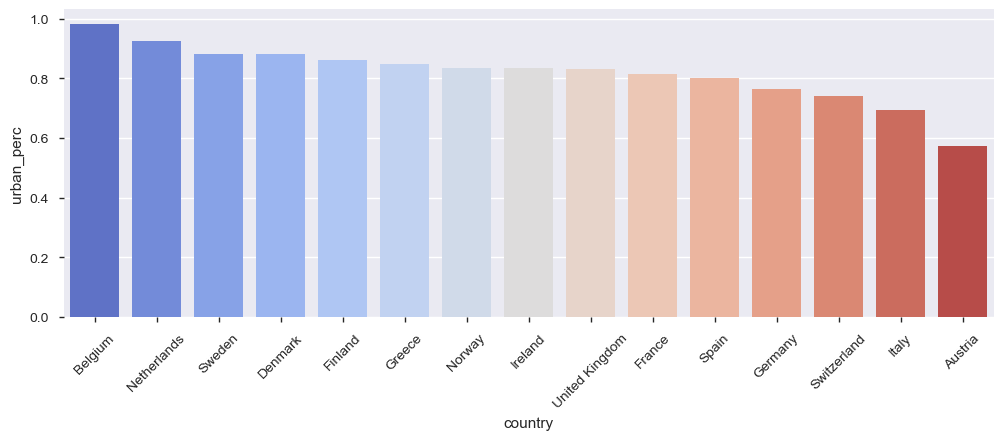

In [0]:
plt.figure(figsize=(12,4))
pd_df = df

pd_df = pd_df.sort_values('urban_perc',ascending=False).reset_index()
sns.barplot(x='country',y='urban_perc', data=df,order = pd_df['country'],palette='coolwarm') # order=ttl_death_order,

plt.xticks(rotation=45)  # rotation='vertical'

In [0]:
df.head()

country code  NO2_reduction_perc     dateRep  cases  deaths_day  \
0      Germany  DEU                 NaN  29/05/2020    741          39   
1       France  FRA               -54.0  29/05/2020   3325          66   
2  Netherlands  NLD                 NaN  29/05/2020    182          32   
3      Belgium  BEL                 NaN  29/05/2020    257          24   
4      Austria  AUT                 NaN  29/05/2020     28          23   

   ttl_death  ttl_ill_pep  population  yearly_pc_chg  ...  urban_population  \
0       8594       183066    83783942         0.0032  ...          63930305   
1      28714       186835    65273511         0.0022  ...          53217966   
2       5931        46257    17134872         0.0022  ...          15847281   
3       9430        58186    11589623         0.0044  ...          11396775   
4        668        16685     9006398         0.0057  ...           5159360   

   world_population_perc  world_population  global_bank  perc_65_plus  \
0                 0.0107        7794798739           19          21.4   
1                 0.0084        7794798739           22          20.3   
2                 0.0022        7794798739           69          18.9   
3                 0.0015        7794798739           81          18.7   
4                 0.0012        7794798739           97          18.8   

   age_65_74  age_75_84  age_85_and_over  pop_65_plus_mln  ttl_mln  
0         47         39               14            17.78    83.10  
1         54         29               17            13.16    64.83  
2         58         31               12             3.27    17.34  
3         53         32               15             2.15    11.46  
4         50         37               13             1.67     8.88  

[5 rows x 26 columns]

The particular features of the viruses' pathogenesis explains its effect on the <big><b>adult</b></big> segment of population, respectively.

The high percentage of  adult people in South Europe and their high concentration in nursing homes, which is typical to this region, have affected the high incidence and mortality rate. This virus causes asymptomatic pneumonia, manifests itself on the stage which requires life supportiat the medical institutions.

We can see it on plot below:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

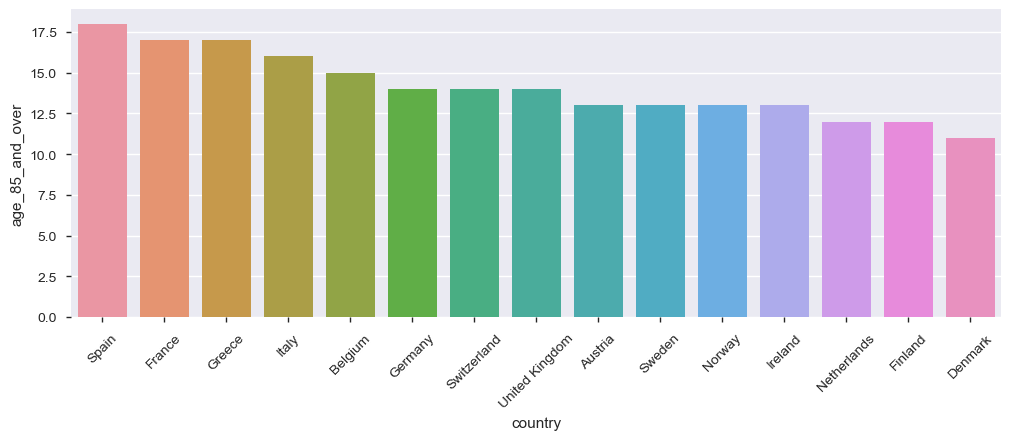

In [0]:
plt.figure(figsize=(12,4))
mpd_df = df
mpd_df = mpd_df.sort_values('age_85_and_over',ascending=False).reset_index()
sns.barplot(x='country',y='age_85_and_over',data=df,order = mpd_df['country']) # order=ttl_death_order,

plt.xticks(rotation=45)

Taking into account the situation with <big><b>total amount of death</b></big> in United Kingdom I would suspect other than adult share of population factor.

Evidently we are facing here missing information, which is interconnected to five hubs in London and multiple category 'A' airports in UK in general.

The information about IATA report for 2019 would share a light on this question.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

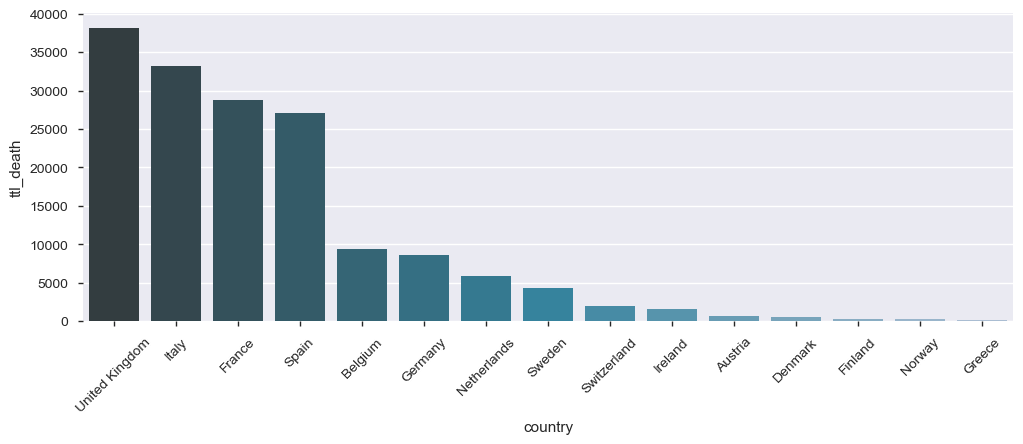

In [0]:
plt.figure(figsize=(12,4))
apd_df = df
apd_df = apd_df.sort_values('ttl_death',ascending=False).reset_index()
sns.barplot(x='country',y='ttl_death',data=df,order = apd_df['country'],palette='PuBuGn_d') 

plt.xticks(rotation=45)

As we can see below, <big><b>migration</b></big> , interconnected with the processes of population displacement from different regions can have influence on CODIVE-19 growth but in case of Germany internal factors: 

 - strict self-distances,
 - constant disinfection,
 - maintaining hygiene principles,
 - using bicycles instead of cars,
 - maintaining a mask regime
 
 play role,as for the rest coountries it proves assumption that high migration  flows and flights
increase the likelihood of spreading the disease

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

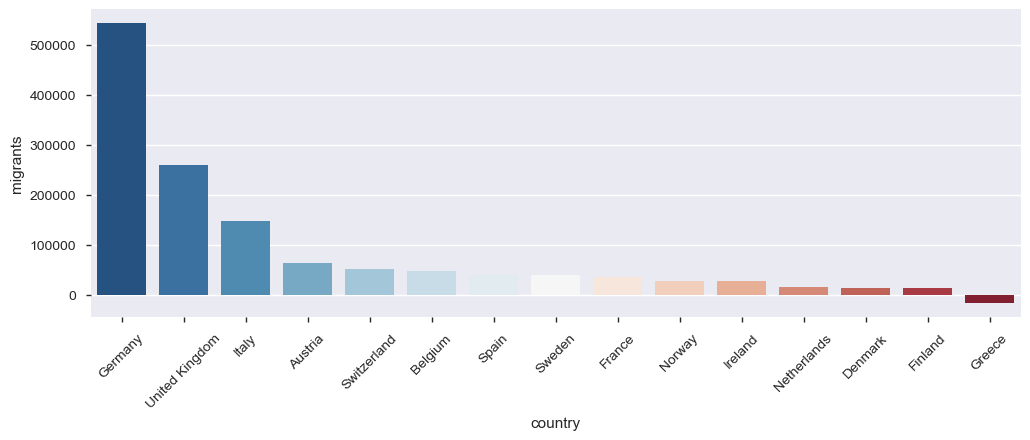

In [0]:
plt.figure(figsize=(12,4))
Dpd_df = df
Dpd_df = Dpd_df.sort_values('migrants',ascending=False).reset_index()
sns.barplot(x='country',y='migrants',data=df,order = Dpd_df['country'],palette='RdBu_r') 

plt.xticks(rotation=45)


As we can see below the rating of <big><b>Global Bank rating</b></big> has no influence on level of spreading of CODIV-19

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

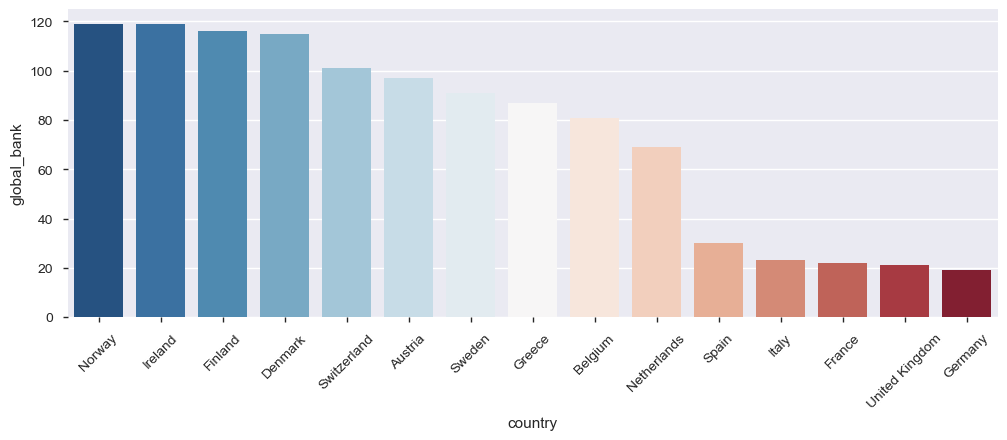

In [0]:
plt.figure(figsize=(12,4))
Wpd_df = df
Wpd_df = Wpd_df.sort_values('global_bank',ascending=False).reset_index()
sns.barplot(x='country',y='global_bank',data=df,order = Wpd_df['country'],palette='RdBu_r') 

plt.xticks(rotation=45)

# except this creteria it has no influence on CODIVE-19 growth

In [0]:
print(df.ttl_ill_pep)

0     183066
1     186835
2      46257
3      58186
4      16685
5      30845
6     232248
7     285644
8       2909
9     271222
10     37113
11     11633
12      6826
13      8425
14     24876
Name: ttl_ill_pep, dtype: int64


In [0]:
df['perc_death'] = (df.ttl_death * 100) / df.ttl_ill_pep

df['perc_death']


# def death_per_ill(ttl_ill_pep, ttl_death):
#     perc_death_per100 = ttl_death * 100 / ttl_ill_pep
#     return perc_death_per100

# # print(death_per_ill(ttl_ill_pep,ttl_death))
# print(death_per_ill(ttl_ill_pep, ttl_death))

0      4.694482
1     15.368641
2     12.821843
3     16.206648
4      4.003596
5      6.221430
6     14.307551
7      9.494686
8      6.015813
9     14.070024
10    11.720960
11     4.882661
12     4.600059
13     2.801187
14     6.612799
Name: perc_death, dtype: float64

In [0]:
df.head()

country code  NO2_reduction_perc     dateRep  cases  deaths_day  \
0      Germany  DEU                 NaN  29/05/2020    741          39   
1       France  FRA               -54.0  29/05/2020   3325          66   
2  Netherlands  NLD                 NaN  29/05/2020    182          32   
3      Belgium  BEL                 NaN  29/05/2020    257          24   
4      Austria  AUT                 NaN  29/05/2020     28          23   

   ttl_death  ttl_ill_pep  population  yearly_pc_chg  ...  \
0       8594       183066    83783942         0.0032  ...   
1      28714       186835    65273511         0.0022  ...   
2       5931        46257    17134872         0.0022  ...   
3       9430        58186    11589623         0.0044  ...   
4        668        16685     9006398         0.0057  ...   

   world_population_perc  world_population  global_bank  perc_65_plus  \
0                 0.0107        7794798739           19          21.4   
1                 0.0084        7794798739           22          20.3   
2                 0.0022        7794798739           69          18.9   
3                 0.0015        7794798739           81          18.7   
4                 0.0012        7794798739           97          18.8   

   age_65_74  age_75_84  age_85_and_over  pop_65_plus_mln  ttl_mln  perc_death  
0         47         39               14            17.78    83.10    4.694482  
1         54         29               17            13.16    64.83   15.368641  
2         58         31               12             3.27    17.34   12.821843  
3         53         32               15             2.15    11.46   16.206648  
4         50         37               13             1.67     8.88    4.003596  

[5 rows x 27 columns]

The percentage of <big><b>Motarlity</b></big> in the proportion of patients falls to a greater extent to the Southern Europe.

With regard to Belgium, we have the assumption that this is due to non-compliance with the measures of self-isolation to the extent that they are necessary to maintain quarantine measures. These are rather social factors. Protocol of medical treatment also can be different.

It would be also interesting to consider the average number of people in a family, especially in the families of Beilgians of the first generation if such information would be available in the future.

The theory of an anthropometric approach is also probable, where the types of viruses spreading in Southern and Northern Europe vary, just as the ethno-genetic groups of the population exposed to them could be different. Group of blood and protein markers could play an essencial role in the level of mortality.

Let me take my mind off the topic a bit off the analyzed region of Western Europe, and draw your attention to the deviation in the mortality rate of men and women. As we know, according to WHO, in the world a greater number of dead are men. At the same time, in Ukraine, more women die from coronovirus. I allow myself to assume that this is possible with greater mobility of the female population. Therefore, I do not exclude the option in which a large mortality rate in Southern Europe, Belgium and the United Kingdom is associated with flights from Southeast Asia, and a correspondingly large viral load on these countries. The answer to this can be given only by statistics that have not yet been published by the regulator for 2019.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

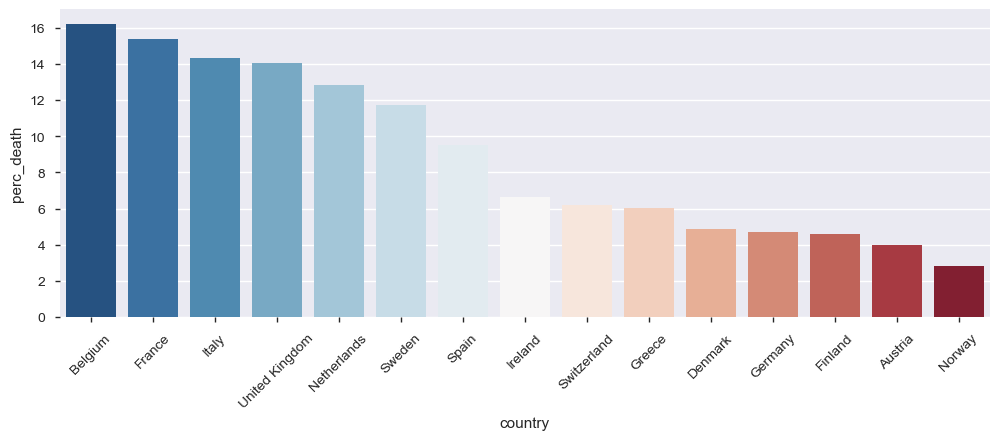

In [0]:
plt.figure(figsize=(12,4))
perc_death_df = df
perc_death_df = perc_death_df.sort_values('perc_death',ascending=False).reset_index()
sns.barplot(x='country',y='perc_death',data=df,order = perc_death_df['country'],palette='RdBu_r') 
plt.style.use('dark_background')

plt.xticks(rotation=45)

In [0]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [0]:
# data = dict(type = 'choropleth',
#             locations = ['AZ','CA','NY'],
#             locationmode = 'USA-states',
#             colorscale= 'Greens',                 # change for .....'Portland', 'Jet'
#             text= ['text1','text2','text3'],
#             z=[1.0,2.0,3.0],
#             colorbar = {'title':'Colorbar Title'})

In [0]:
import plotly.express as px
import plotly.graph_objects as go


In [0]:
geo_df = df

fig = go.Figure(data=go.Choropleth(
    locations = geo_df['code'],
    z = geo_df['ttl_ill_pep'],
    text = geo_df['country'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '\npeople\n',
    colorbar_title = 'Thousand<br>People',
))

fig.update_layout(
    title_text='2020 Europe statystics',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.worldometers.info/coronavirus/">\
            Worldometr</a>',
        showarrow = False
    )]
)

fig.show()

To analyze the maintenance of quarantine by different countries in Europe, we used interactive maps and compared the periods of January and the end of May 2020.

As we can see, emissions of <big><b>NO2</b></big> was significantly reduced. Accordingly, the regulators of these countries did all possible to maintain the quarantine regime, in order to avoid the rapid spread of the virus and increase the load of medical institutions. This is a very reasonable and thoughtful decision that saved thousands of lives.

There are other statistics that comparatively indicate the number of air flights before and during the quarantine period, which also influenced the decrease in the level of <big><b>NO2</b></big>.

As we can see high emission zones in North Europe, presisely in Germany where robotic manufactures are highly developed still persists.

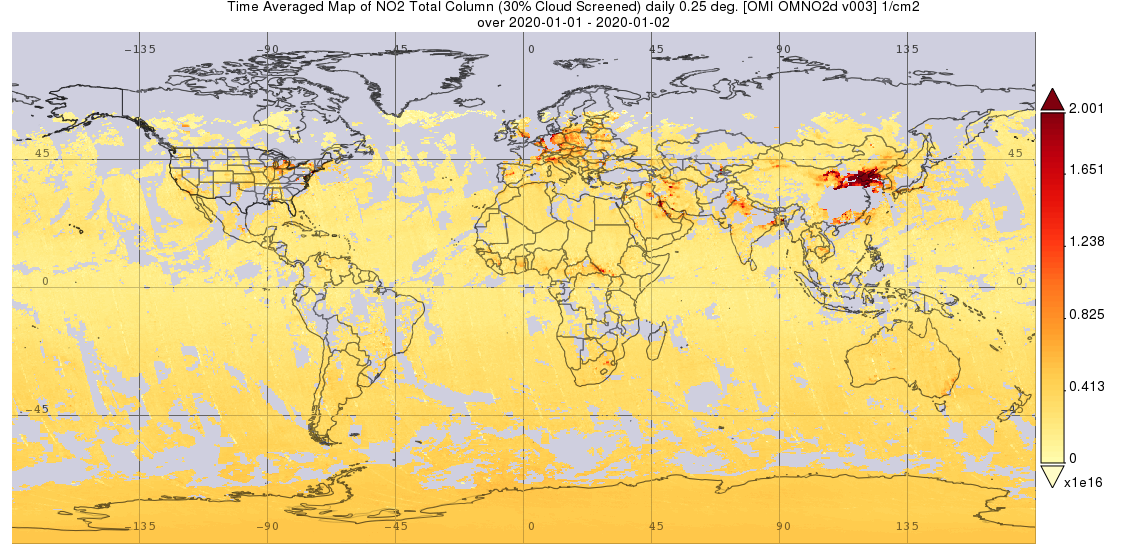

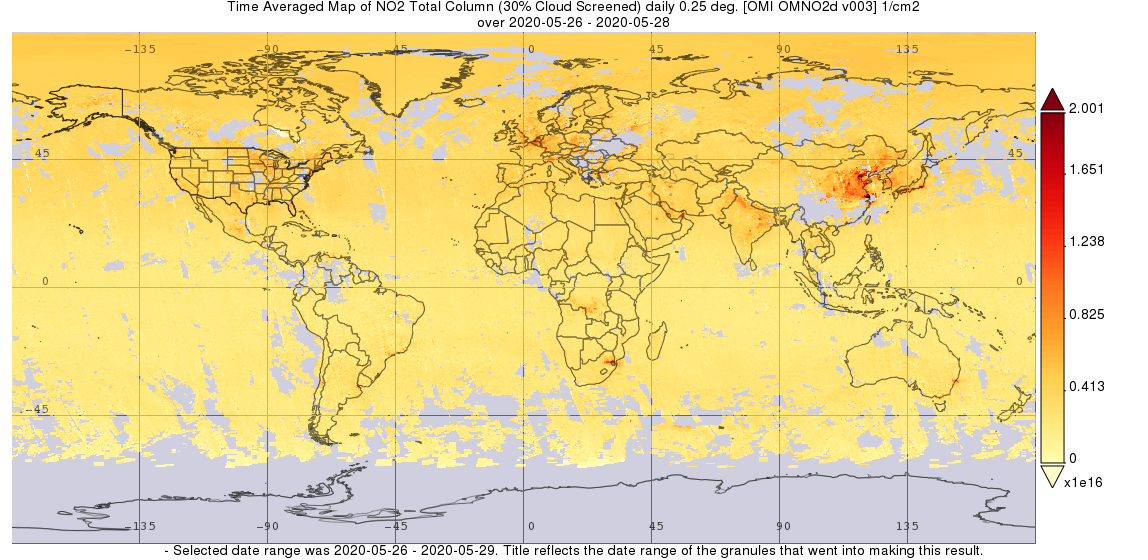

In [0]:
from IPython.display import Image, display

listOfImageNames = [r'C:\Users\Alina\Desktop\Countires\GIOVANNI-outputGXiq6k3a.png',
                    r'C:\Users\Alina\Desktop\Countires\GIOVANNI-outputLSWWA6Gg.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

The everage persentage of  <big><b>NO2</b></big>. drop is <big><b>48% - 54%</b></big>. Only most essencial manufectures were working so we can assume that quaranteen regime was kept.

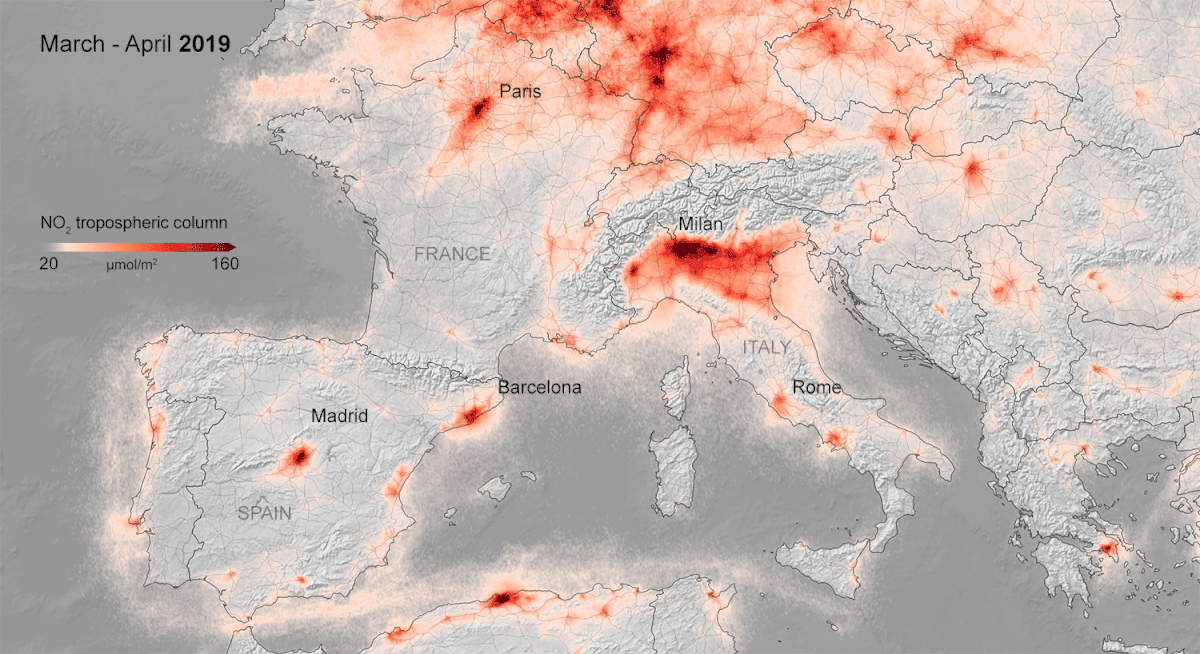

In [0]:
listOfImageNames = [r'C:\Users\Alina\Desktop\Countires\NO2_concentrations_over_Europe.gif']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

In [0]:
df_continious = pd.read_csv(r'C:\Users\Alina\Desktop\Countires\COVID-19-EUROPE_selected.csv')

In [0]:
df_continious.head()

day  month  cases  deaths  country
0   29      5     28      23  Austria
1   28      5     18       2  Austria
2   27      5     38       2  Austria
3   26      5     20       1  Austria
4   25      5     32       1  Austria

The below are different types of visualisation used for estimation and prediction of CODIVE-19 situation in Europe

In [0]:
# df_continious.iplot(x='month',y='deaths',kind='surface')

# df_continious[['month','deaths']].iplot(kind='spread')
df_continious[['cases','deaths','day','country']].iplot(kind='spread')

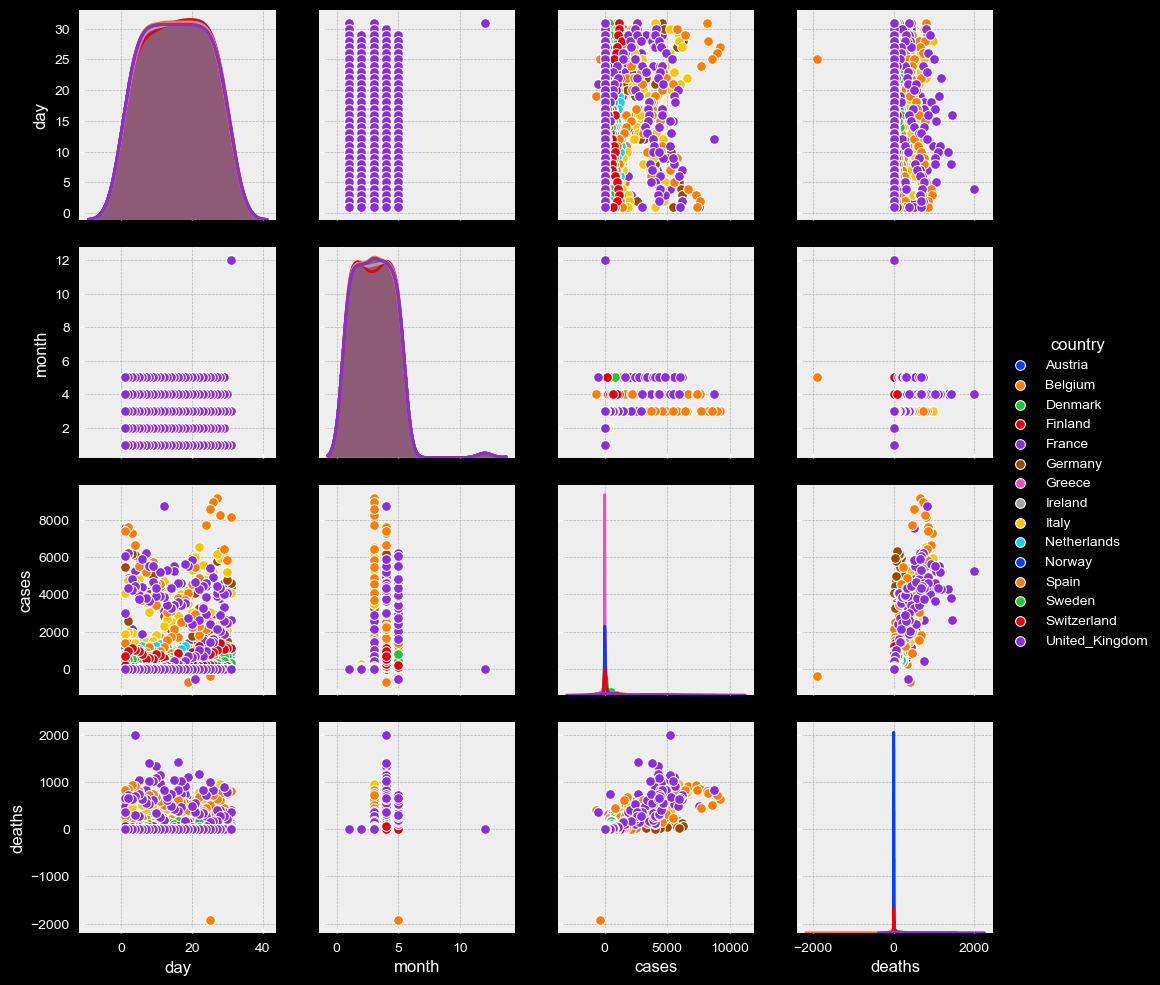

In [0]:
plt.style.use('bmh')
sns.pairplot(df_continious,hue='country',palette='bright')


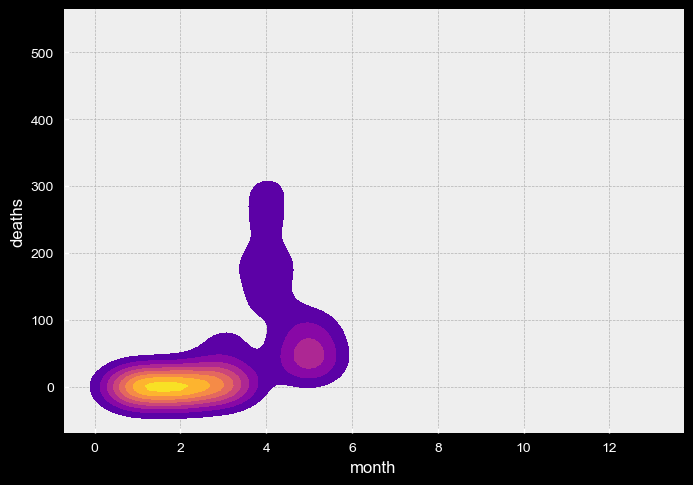

In [0]:
bdc = df_continious[df_continious['country']=='Belgium']
sns.kdeplot( bdc['month'], bdc['deaths'],
                 cmap="plasma", shade=True, shade_lowest=False)

Based on above step-by step estimation we chose SVM model for prediction

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df_continious.drop('country',axis=1)
y = df_continious['country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [0]:
from sklearn.svm import SVC

In [0]:
svc_model = SVC()

In [0]:
svc_model.fit(X_train,y_train)

C:\Users\Alina\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
predictions = svc_model.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(confusion_matrix(y_test,predictions))

[[ 0  2  5  2  0  0  3  0  0 26  5  0  0  1  2]
 [ 2  0  5  3  1  0  7  1  0 22  1  0  2  2  0]
 [ 1  0  1  3  0  0  7  1  0 28  2  0  2  0  0]
 [ 3  1  5  3  0  0  6  2  0 14  3  0  1  0  1]
 [ 1  0  2  1  0  2  2  0  0 33  0  2  1  0  0]
 [ 3  2  4  0  2  0  4  2  0 36  1  1  2  1  2]
 [ 2  2  4  3  0  0  4  0  0 22  3  0  1  1  0]
 [ 1  0  3  3  0  0  5  2  0 23  1  0  2  1  0]
 [ 1  1  6  1  1  0  5  1  0 28  0  0  1  1  0]
 [ 1  1  5  2  1  0  2  0  0 16  0  0  0  3  0]
 [ 3  1  5  2  1  0  4  1  0 21  3  0  1  0  0]
 [ 1  0  6  1  0  0  5  1  0 30  0  1  2  2  0]
 [ 1  3  7  2  0  0  1  1  0 31  0  0  1  3  0]
 [ 1  0  5  3  0  0  2  0  0 32  1  0  2  0  0]
 [ 2  0  2  2  1  0  6  2  0 30  4  0  1  0  0]]


In [0]:
print(classification_report(y_test,predictions))

                precision    recall  f1-score   support

       Austria       0.00      0.00      0.00        46
       Belgium       0.00      0.00      0.00        46
       Denmark       0.02      0.02      0.02        45
       Finland       0.10      0.08      0.09        39
        France       0.00      0.00      0.00        44
       Germany       0.00      0.00      0.00        60
        Greece       0.06      0.10      0.08        42
       Ireland       0.14      0.05      0.07        41
         Italy       0.00      0.00      0.00        46
   Netherlands       0.04      0.52      0.08        31
        Norway       0.12      0.07      0.09        42
         Spain       0.25      0.02      0.04        49
        Sweden       0.05      0.02      0.03        50
   Switzerland       0.00      0.00      0.00        46
United_Kingdom       0.00      0.00      0.00        50

      accuracy                           0.05       677
     macro avg       0.05      0.06      0.03 

C:\Users\Alina\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



GridSearchCV: the parameters of the estimator used to apply these methods are optimized by 
cross-validated grid-search over a parameter grid.

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [0]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................


C:\Users\Alina\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   0.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    7.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [0]:
grid_predictions = grid.predict(X_test)

In [0]:
print(confusion_matrix(y_test,grid_predictions))

[[ 2  1  3  5  2  1 24  5  0  0  1  1  1  0  0]
 [ 3  3  1  2  0  0 26  1  3  2  2  1  1  1  0]
 [ 2  0  8 12  0  0 20  3  0  0  0  0  0  0  0]
 [ 4  0  3  9  0  0 22  0  0  0  1  0  0  0  0]
 [ 0  4  1  0  2  1 14  1 19  0  1  1  0  0  0]
 [ 0  3  1  1  2  7 27  1 11  2  1  1  3  0  0]
 [ 4  0  2  3  0  0 33  0  0  0  0  0  0  0  0]
 [ 3  0  3  2  1  2 22  4  0  1  1  0  1  1  0]
 [ 0  3  0  2  0  0 19  1 15  3  1  0  1  0  1]
 [ 0  3  2  0  0  0 15  0  0  6  1  1  2  1  0]
 [ 7  0  5  5  0  1 23  0  0  0  0  0  1  0  0]
 [ 0  1  0  0  2  1 23  1 15  1  0  4  0  0  1]
 [ 2  4  4  2  2  0 22  4  1  1  2  0  5  0  1]
 [ 6  1  3  2  1  1 20  1  2  2  1  3  1  2  0]
 [ 1  0  0  1  1  1 22  0 22  1  0  0  0  1  0]]


In [0]:
print(classification_report(y_test,grid_predictions))

                precision    recall  f1-score   support

       Austria       0.06      0.04      0.05        46
       Belgium       0.13      0.07      0.09        46
       Denmark       0.22      0.18      0.20        45
       Finland       0.20      0.23      0.21        39
        France       0.15      0.05      0.07        44
       Germany       0.47      0.12      0.19        60
        Greece       0.10      0.79      0.18        42
       Ireland       0.18      0.10      0.13        41
         Italy       0.17      0.33      0.22        46
   Netherlands       0.32      0.19      0.24        31
        Norway       0.00      0.00      0.00        42
         Spain       0.33      0.08      0.13        49
        Sweden       0.31      0.10      0.15        50
   Switzerland       0.33      0.04      0.08        46
United_Kingdom       0.00      0.00      0.00        50

      accuracy                           0.15       677
     macro avg       0.20      0.15      0.13 

Conclusion:

Positive tendency to overcome COVID-19 in the most short time has: Germany, Netherland, Norway, Denmark
Countries of South Europe can suffer longer due to age structure of population and breaking the rules of cosial distancing.
Such countries as UK and Belgium need to pay attention to migration process and their transit hubs which could pay an important role into spread of desise. The location of most part of population of these countires into urban centers could also be a triger of spark.

The complex approach is required to make clear prediction about CODIVE-19 situation in Europe and factors which coursed it. We would assume that information form air regulator would be helpfull to have full picture what which led to such a proliferation.

- maintaining the practice of social distance, especially for senior citizens,
- reducing mobility,
- maintaining strict hygiene measures,
- implementing secluded living outside the territory of large urban centers,

all this helps to reduce the number of cases.
At this stage, we will need more capacious data related to the:

- age breakdown,
- blood type of the sick and recovered people,
- distribution of the population belonging to ethnic groups, who are the carrier of certain protein markers.

Using Nasa satellite maps helped us confirm statistics on maintaining social distance during the quarantine period, as indicated by a decrease in emissions